<a href="https://colab.research.google.com/github/Priyankasgupta17/IBM-Employee-Attrition/blob/main/IBM_Attrition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required Libraries and read the csv file
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
data = pd.read_csv('/content/Python_Project_Dataset.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Get to know more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Describing the data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Check for null data
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Check for duplicate and drop duplicates
data.duplicated().sum()
data = data.drop_duplicates()

In [ ]:
# Drop the data rows
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [ ]:
# Convert the categorical variables to dummy variables
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])
data['Age'] = data['Age'].astype('int64')
data['Education'] = data['Education'].astype('category')
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].astype('category')
data['JobInvolvement'] = data['JobInvolvement'].astype('category')
data['JobLevel'] = data['JobLevel'].astype('category')
data['JobSatisfaction'] = data['JobSatisfaction'].astype('category')
data['PerformanceRating'] = data['PerformanceRating'].astype('category')
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].astype('category')
data['StockOptionLevel'] = data['StockOptionLevel'].astype('category')
data['WorkLifeBalance'] = data['WorkLifeBalance'].astype('category')


In [ ]:
# Convert the cleaned data set into csv format
data.to_csv('CleanedEmployeeAttrition.csv')

In [ ]:
# convert category to integers
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0}, na_action='ignore').fillna(0)
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0}, na_action='ignore').fillna(0)


In [ ]:
# Again view the data
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
# import library to plot the graph
import plotly.graph_objects as go

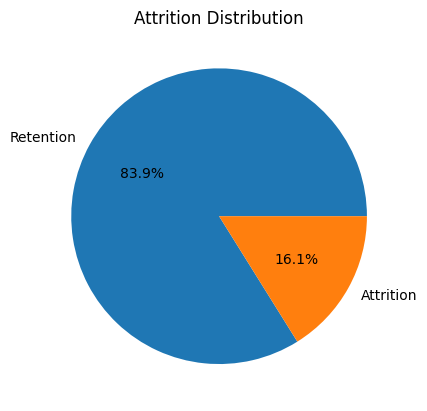

In [ ]:
# plotting pie graph using column attrition in the dataset
counts = data['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()

In [ ]:
# Attrition or Retention v/s Job level

# Get the count of employees for each combination of job level and attrition
counts = data.groupby(['JobLevel', 'Attrition']).size().reset_index(name='Count')

# Pivot the table to get a dataframe that has JobLevel as rows, and attrition count for 0 and 1 as columns
pivoted_counts = counts.pivot(index='JobLevel', columns='Attrition', values='Count')

# Create the bar plot
fig = go.Figure()

fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts[0], name='Retention'))
fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts[1], name='Attrition'))

# Update the layout
fig.update_layout(title='Attrition and Retention by Job Level',
                  xaxis_title='Job Level',
                  yaxis_title='No. of Employee',
                  barmode='group')

# Add hover information
fig.update_traces(hovertemplate='Job Level: %{x}<br>Count: %{y}')

# Show the plot
fig.show()


In [ ]:
# Attrition and Retention v/s Work Life Balance

# Group the data by WorkLifeBalance and Attrition and get the counts
counts = data.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to create the double bar chart
pivoted_counts = counts.pivot(index='WorkLifeBalance', columns='Attrition', values='Count')

# Create the double bar chart
fig = go.Figure(data=[
    go.Bar(name='Retention', x=pivoted_counts.index, y=pivoted_counts[0]),
    go.Bar(name='Attrition', x=pivoted_counts.index, y=pivoted_counts[1])
])

# Add axis labels and title
fig.update_layout(
    title='Attrition and Retention against Work Life Balance',
    xaxis_title='Work Life Balance',
    yaxis_title='No. of Employee'
)

# Add hover information
fig.update_traces(hovertemplate='Work Life Balance: %{x}<br>Count: %{y}')

# Show the plot
fig.show()

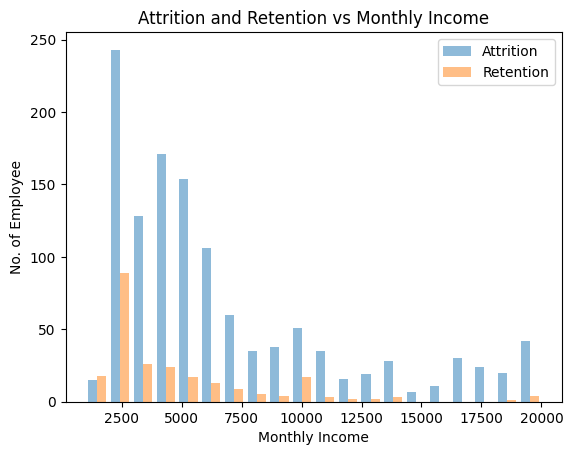

In [ ]:
# Attrition and Retention vs Monthly Income

# Create histogram
plt.hist([data[data['Attrition']==0]['MonthlyIncome'], data[data['Attrition']==1]['MonthlyIncome']],
         bins=20, alpha=0.5, label=['Attrition', 'Retention'])

# Add axis labels and title
plt.xlabel('Monthly Income')
plt.ylabel('No. of Employee')
plt.title('Attrition and Retention vs Monthly Income')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Attrition and Retention v/s Distance From Home

# Group the data by DistanceFromHome and Attrition and get the counts
counts = data.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to create the double bar chart
pivoted_counts = counts.pivot(index='DistanceFromHome', columns='Attrition', values='Count')

# Create the double bar chart
fig = go.Figure(data=[
    go.Bar(name='Retention', x=pivoted_counts.index, y=pivoted_counts[0]),
    go.Bar(name='Attrition', x=pivoted_counts.index, y=pivoted_counts[1])
])

# Add axis labels and title
fig.update_layout(
    title='Attrition and Retention against Distance From Home',
    xaxis_title='Distance From Home',
    yaxis_title='No. of Employee'
)

# Add hover information
fig.update_traces(hovertemplate='Distance From Home: %{x}<br>Count: %{y}')

# Show the plot
fig.show()

In [ ]:
# Attrition and Retention v/s Job Satisfaction
# Group the data by JobSatisfaction and Attrition and get the counts
counts = data.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to create the double bar chart
pivoted_counts = counts.pivot(index='JobSatisfaction', columns='Attrition', values='Count')

# Create the double bar chart
fig = go.Figure(data=[
    go.Bar(name='Retention', x=pivoted_counts.index, y=pivoted_counts[0]),
    go.Bar(name='Attrition', x=pivoted_counts.index, y=pivoted_counts[1])
])

# Add axis labels and title
fig.update_layout(
    title='Attrition and Retention against Job Satisfaction',
    xaxis_title='Job Satisfaction',
    yaxis_title='No. of Employee'
)

# Add hover information
fig.update_traces(hovertemplate='Job Satisfaction: %{x}<br>Count: %{y}')

# Show the plot
fig.show()

In [ ]:
# Attrition and Retention v/s Environment Satisfaction

# Group the data by EnvironmentSatisfaction and Attrition and get the counts
counts = data.groupby(['EnvironmentSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to create the double bar chart
pivoted_counts = counts.pivot(index='EnvironmentSatisfaction', columns='Attrition', values='Count')

# Create the double bar chart
fig = go.Figure(data=[
    go.Bar(name='Retention', x=pivoted_counts.index, y=pivoted_counts[0]),
    go.Bar(name='Attrition', x=pivoted_counts.index, y=pivoted_counts[1])
])

# Add axis labels and title
fig.update_layout(
    title='Attrition and Retention against Environment Satisfaction',
    xaxis_title='Environment Satisfaction',
    yaxis_title='No. of Employee'
)

# Add hover information
fig.update_traces(hovertemplate='Environment Satisfaction: %{x}<br>Count: %{y}')

# Show the plot
fig.show()

In [ ]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
pearson_corr = data.corr(method='pearson')
data = data.dropna()

In [ ]:
pearson_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.015710,-0.005620,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571


In [ ]:
# Linear Regression
data = data.rename(columns={'JobRole_Sales Representative': 'JobRole_Sales_Representative'})
model = smf.ols(formula='Attrition ~ JobLevel+JobSatisfaction+Age+MonthlyIncome+OverTime+WorkLifeBalance', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     18.90
Date:                Tue, 21 May 2024   Prob (F-statistic):           2.38e-41
Time:                        15:43:15   Log-Likelihood:                -500.63
No. Observations:                1470   AIC:                             1029.
Df Residuals:                    1456   BIC:                             1103.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6031 